In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle

In [3]:
with open('p_1_array.pickle','rb') as file:
    df = pickle.load(file)

In [4]:
df.head()

,description,sidebar_color,profileimage,gender
0,i sing my own rhythm.,FFFFFF,"[[[253, 163, 131], [255, 176, 124], [255, 180,...",male
1,I'm the author of novels filled with family dr...,C0DEED,"[[[119, 109, 97], [118, 108, 98], [116, 108, 9...",male
2,louis whining and squealing and all,C0DEED,"[[[204, 214, 221], [204, 214, 221], [204, 214,...",male
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",C0DEED,"[[[204, 214, 221], [204, 214, 221], [204, 214,...",male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,"[[[255, 246, 249], [255, 247, 250], [254, 248,...",female


In [11]:
df.iloc[:,:3]

,description,sidebar_color,profileimage
0,i sing my own rhythm.,FFFFFF,"[[[253, 163, 131], [255, 176, 124], [255, 180,..."
1,I'm the author of novels filled with family dr...,C0DEED,"[[[119, 109, 97], [118, 108, 98], [116, 108, 9..."
2,louis whining and squealing and all,C0DEED,"[[[204, 214, 221], [204, 214, 221], [204, 214,..."
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",C0DEED,"[[[204, 214, 221], [204, 214, 221], [204, 214,..."
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,"[[[255, 246, 249], [255, 247, 250], [254, 248,..."
...,...,...,...
20045,(rp),C0DEED,"[[[204, 214, 221], [204, 214, 221], [204, 214,..."
20046,"Whatever you like, it's not a problem at all. ...",0,"[[[204, 214, 221], [204, 214, 221], [204, 214,..."
20047,#TeamBarcelona ..You look lost so you should f...,C0DEED,"[[[204, 214, 221], [204, 214, 221], [204, 214,..."
20048,Anti-statist; I homeschool my kids. Aspiring t...,0,"[[[204, 214, 221], [204, 214, 221], [204, 214,..."


In [12]:
x_df = df.iloc[:,:3]

In [13]:
x_df.values

array([['i sing my own rhythm.', 'FFFFFF',
        array([[[253, 163, 131],
        [255, 176, 124],
        [255, 180, 122],
        ...,
        [245, 243, 253],
        [240, 237, 251],
        [238, 232, 246]],

       [[254, 162, 131],
        [255, 171, 127],
        [255, 178, 122],
        ...,
        [239, 234, 247],
        [236, 232, 247],
        [232, 227, 237]],

       [[254, 162, 130],
        [255, 171, 128],
        [254, 184, 120],
        ...,
        [234, 226, 234],
        [232, 221, 229],
        [224, 213, 217]],

       ...,

       [[254, 159, 128],
        [252, 194, 172],
        [252, 241, 228],
        ...,
        [173,  75,  79],
        [194,  73,  92],
        [220,  77, 107]],

       [[254, 153, 134],
        [253, 161, 133],
        [247, 160, 164],
        ...,
        [178,  67,  76],
        [206,  68,  97],
        [230,  77, 117]],

       [[252, 119, 138],
        [250, 115, 131],
        [247, 102, 128],
        ...,
        [169,  49,  71]

In [21]:
x_df.iloc[0,2].shape

(48, 48, 3)

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GRU, Embedding, Flatten, concatenate, Input
#Dense for NN, Conv2d Maxpool2d Flatten for CNN , GRU Embedding for RNN , Input concatenate for functional API
from tensorflow.keras.optimizers import SGD

In [16]:
# build RNN
InputA = Input(shape=(100,))
a = Embedding(10000,128)(InputA)
a = GRU(128, dropout=0.2, recurrent_dropout=0.2)(a)
a = Dense(10, activation='relu')(a)
a = Model(inputs=InputA , outputs=a)

In [17]:
# build NN
InputB = Input(1,)
b = Dense(10, activation='relu')(InputB)
b = Dense(16, activation='softmax')(b)
b = Model(inputs=InputB, outputs=b)

In [25]:
# build CNN
InputC = Input(shape=(48,48,3,))
c = Conv2D(16, (3,3), padding='same', activation = 'relu')(InputC)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Conv2D(32, (3,3), padding='same', activation = 'relu')(c)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Conv2D(64, (3,3), padding='same', activation = 'relu')(c)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Conv2D(128, (3,3), padding='same', activation = 'relu')(c)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Flatten()(c)
c = Model(inputs=InputC, outputs=c)

In [26]:
# combine
combined = concatenate([a.output, b.output, c.output])
d = Dense(10, activation='relu')(combined)
d = Dense(2, activation='softmax')(d)
model = Model(inputs=[InputA, InputB, InputC], outputs=d)

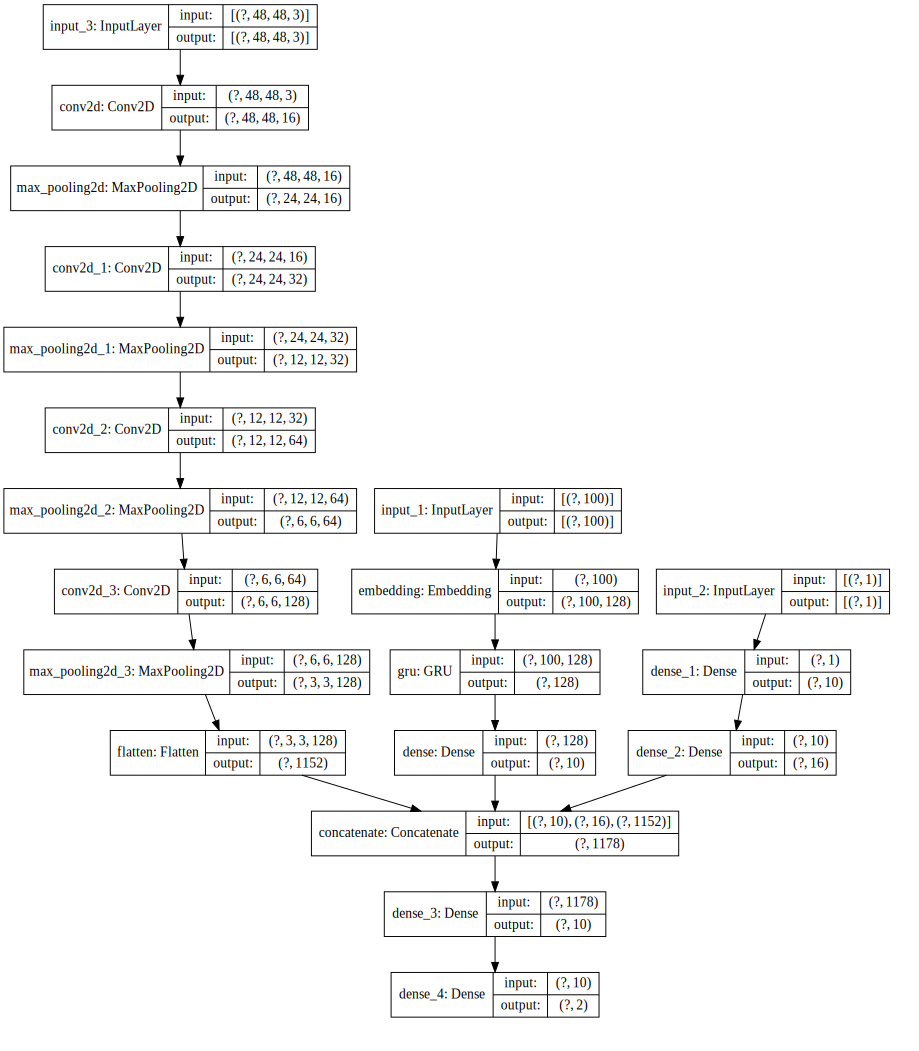

In [28]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model,show_shapes=True, dpi=70).create(prog='dot', format='svg'))